# Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners

# Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

# Column Descriptors:


Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.


# Questions:

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful
2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot
5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist
7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('/content/spotify.csv')

In [28]:
# Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [29]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


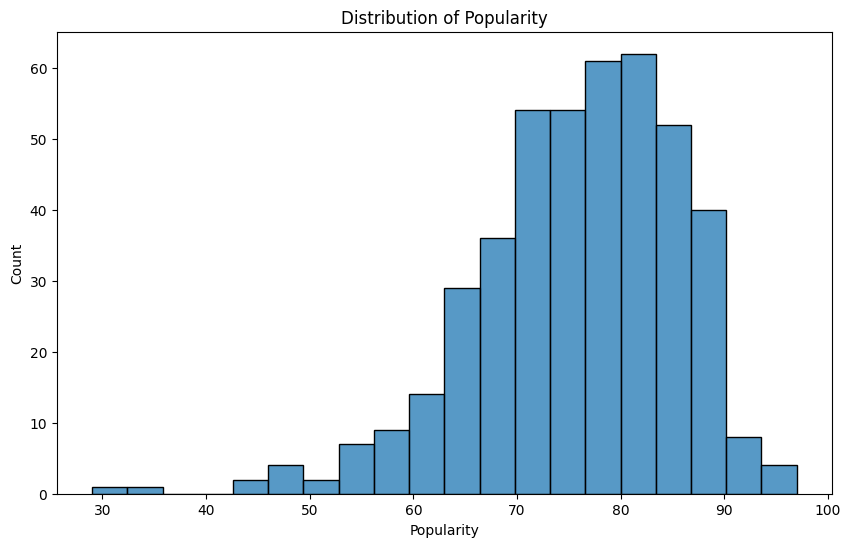

In [30]:
# distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'])
plt.title('Distribution of Popularity');

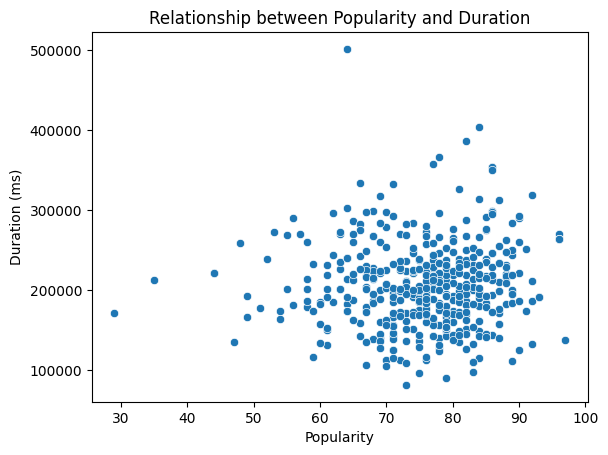

In [31]:
# Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
sns.scatterplot(data = df ,x = "Popularity", y=  "Duration (ms)")
plt.title('Relationship between Popularity and Duration');

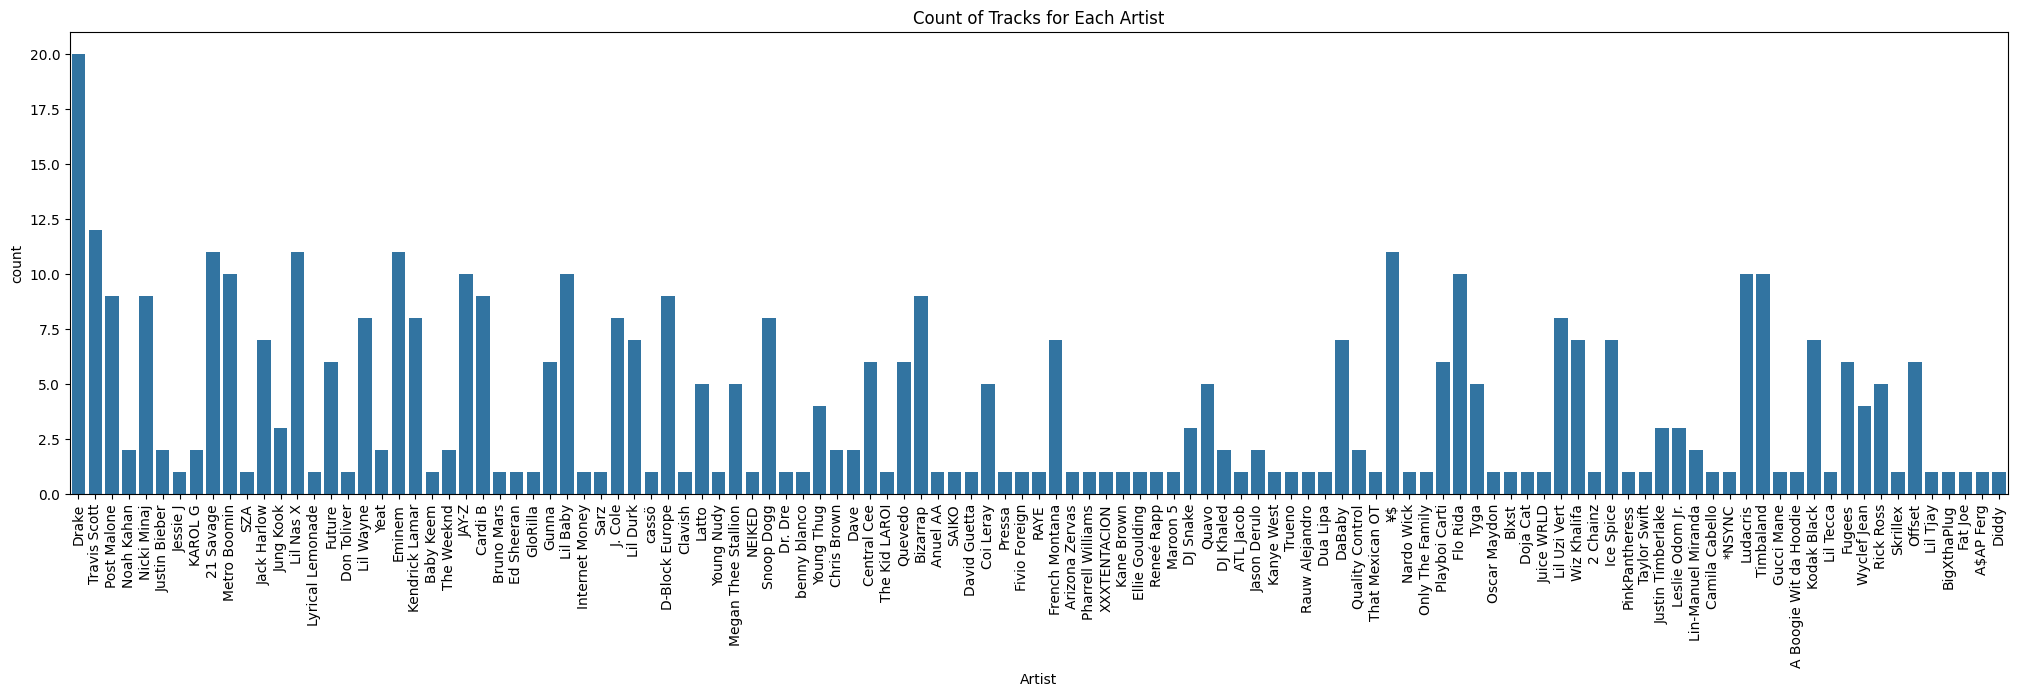

In [74]:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
plt.figure(figsize=(25, 6))
sns.countplot(data = df , x = "Artist")
plt.xticks(rotation = 90)
plt.title('Count of Tracks for Each Artist');

In [34]:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df.sort_values(by = 'Popularity', ascending = True).head()
print(least_popular_tracks[['Artist', 'Track Name']])

             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
435  French Montana                Splash Brothers
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix


In [35]:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)
print(top_5_artists)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [46]:
# top 5 most popular artists, what are their most popular tracks? List the track name for each artist

top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)

most_popular_tracks = (
    df[df['Artist'].isin(top_5_artists.index)]
    .sort_values(['Artist', 'Popularity'], ascending=False)
    .groupby('Artist', as_index=False)
    .first()[['Artist', 'Track Name']]
)

print(most_popular_tracks)


         Artist                    Track Name
0  David Guetta            Baby Don't Hurt Me
1  Travis Scott    FE!N (feat. Playboi Carti)
2        Trueno  Mamichula - con Nicki Nicole
3         cassö                         Prada
4            ¥$                      CARNIVAL


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


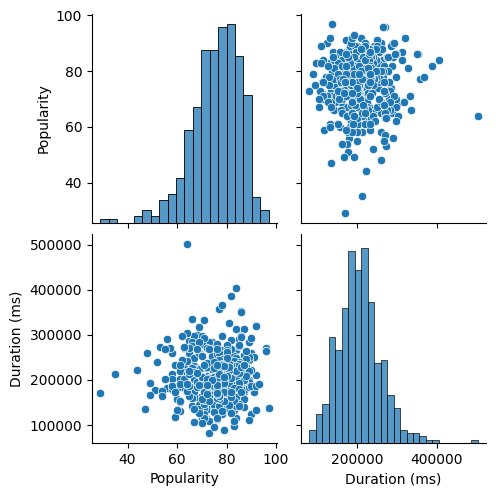

In [49]:
# Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(df[['Popularity', 'Duration (ms)']]);

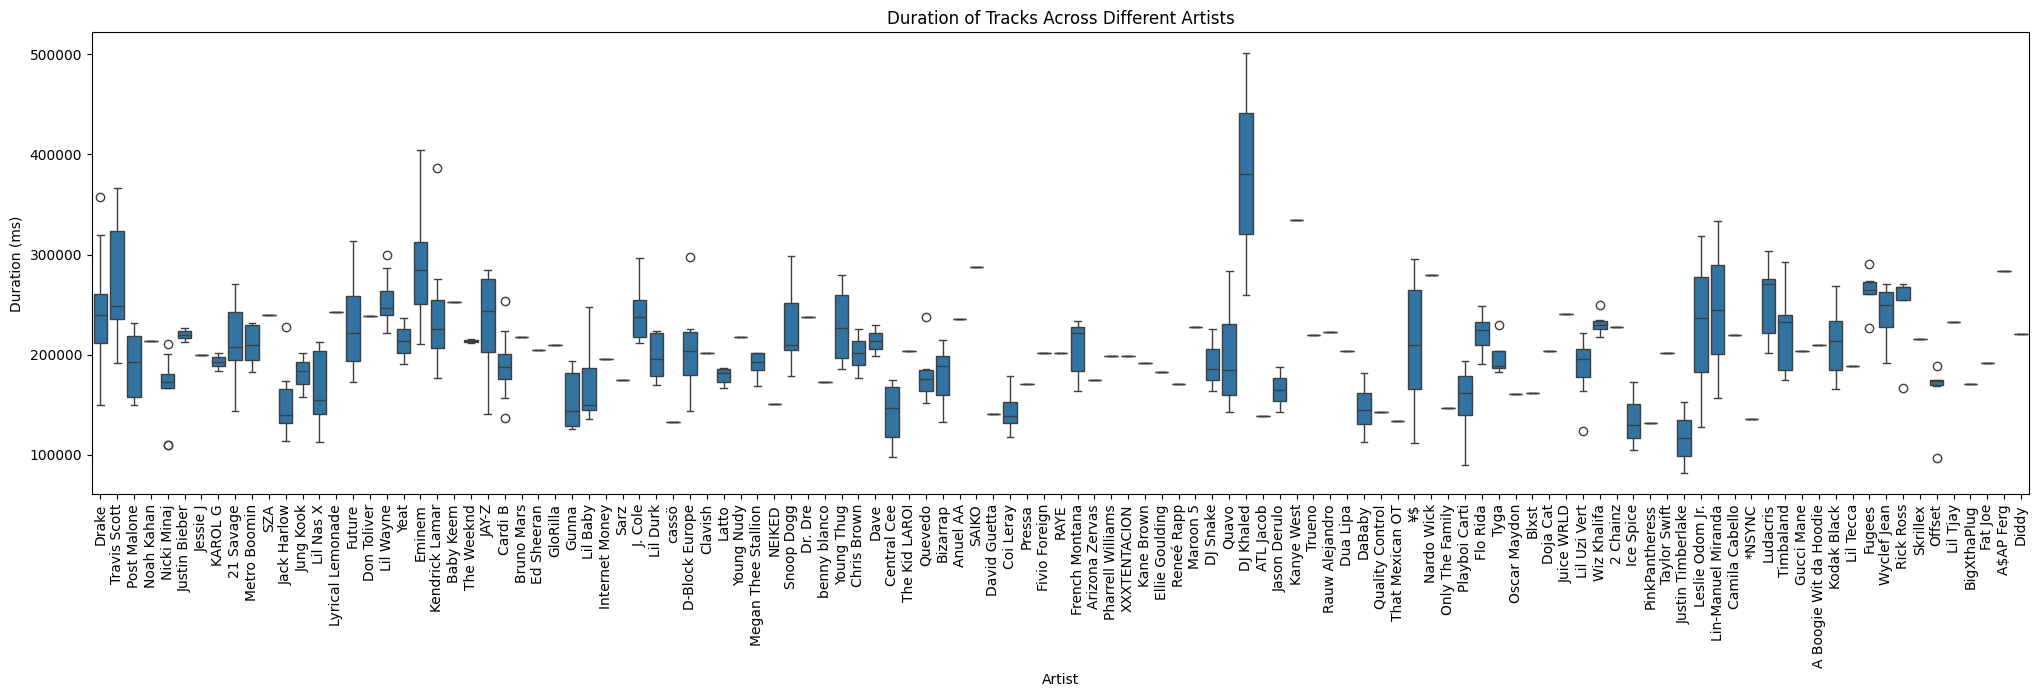

In [73]:
#  duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(25, 6))
sns.boxplot(data=df, x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)');


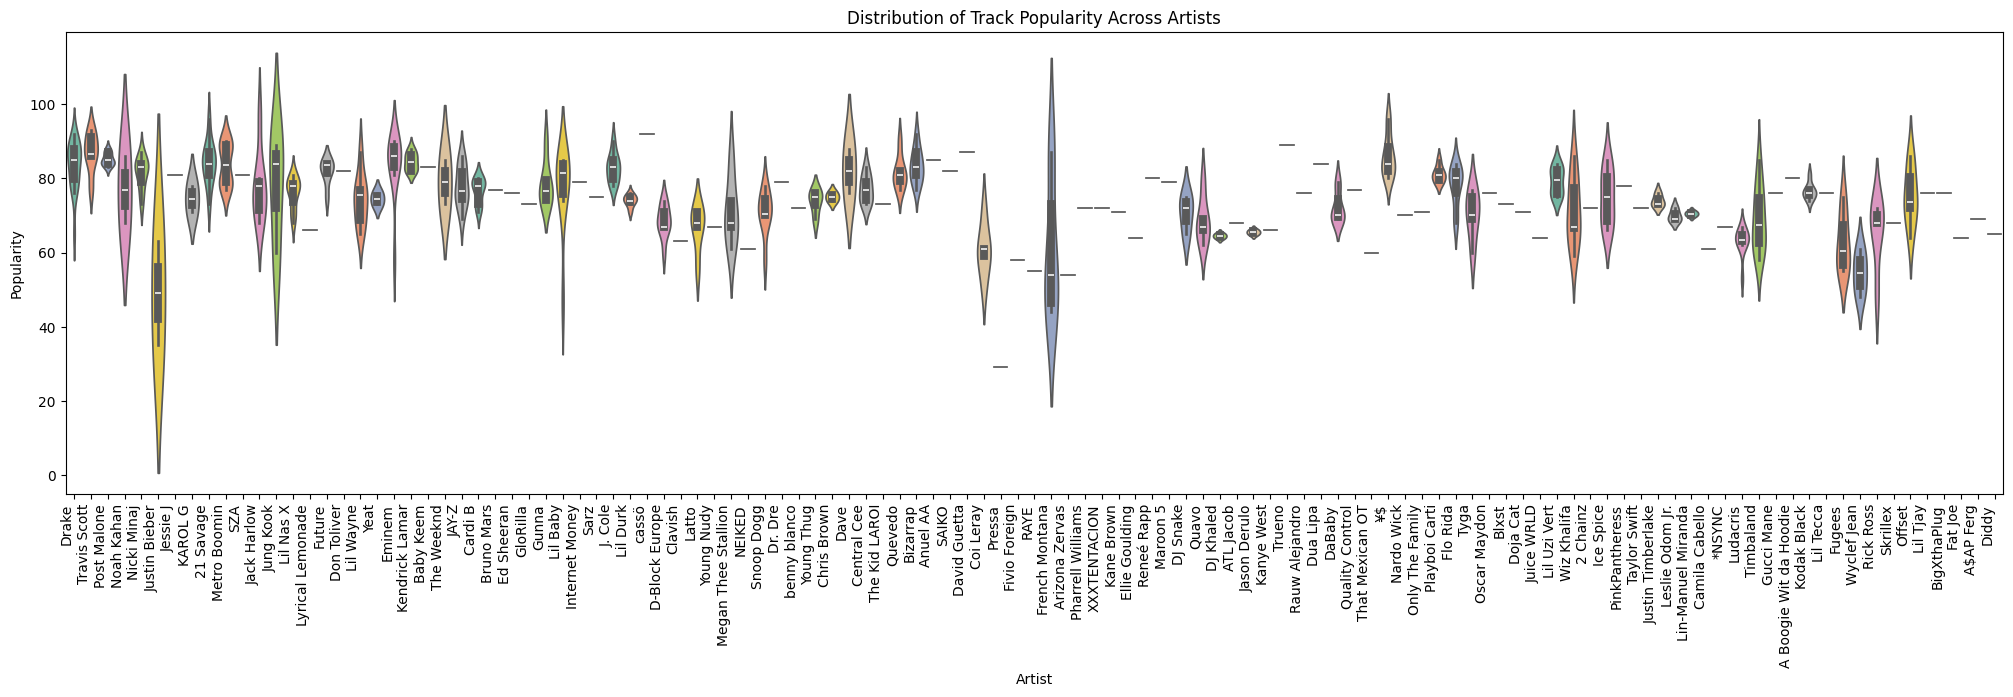

In [71]:
# distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(25, 6))
sns.violinplot(data=df, x='Artist', y='Popularity', palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.title("Distribution of Track Popularity Across Artists")
plt.xlabel("Artist");